# Tech challenge - Grupo 9 - É chikungunya?

## Sobre


### Dicionario de dados das colunas utilizadas

[Link detalhado](./dicionario_dados_colunas_utilizadas.md)


### variaveis:

- df_original: valor do dataframe sem modificação
- df: valor do dataframe modificado ao longo dos blocos
- cols_sintomas: nomes de colunas relacionadas a sintomas
- cols_comorbidades: nomes de colunas relacionadas a sintomas 
- cols_exames: nomes de colunas relacionadas a exame
- col_target: nome da coluna target
- colunas_selecionada: soma de todas as colunas

### Links Uteis

- [Informações sobre a de dados](https://dadosabertos.saude.gov.br/dataset/arboviroses-febre-de-chikungunya)
- [Dicionário de dados](./dic_dados_chikungunya.pdf)
- [Base de dados 2025](./dados/CHIKBR25.csv)


## Requisitos

In [1]:
! pip install pandas scikit-learn seaborn matplotlib missingno


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Importações e configurações

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df_original = pd.read_csv("./dados/CHIKBR25.csv")
df_original.head()

/var/folders/4j/njw9p8495rlfr3vbcc99dpnc0000gn/T/ipykernel_36405/2247410492.py:1: DtypeWarning: Columns (22,50,52,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("./dados/CHIKBR25.csv")


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A920,2024-12-30,202501,2024,32,320060,32001.00,2449218.00,2024-12-30,202501,1989.00,4035,F,5.00,1,6.00,32,320060.00,32001.00,1,2024-12-30,10001.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,4.00,NaN,4.00,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
1,2,A920,2024-12-30,202501,2024,32,320405,32003.00,2484536.00,2024-12-29,202501,1980.00,4044,M,5.00,4,9.00,32,320405.00,32003.00,1,2024-12-30,10001.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,1.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,13.00,1.00,NaN,NaN,1.00,NaN,2025-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
2,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,1996.00,4028,M,6.00,4,9.00,32,320130.00,32002.00,1,2024-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
3,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,1979.00,4045,F,5.00,1,9.00,32,320130.00,32002.00,1,2024-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
4,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,2008.00,4016,F,5.00,4,9.00,32,320130.00,32002.00,1,2024-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,N

## Análise Exploratória de Dados (EDA)

In [4]:
# Quantidade de linhas e colunas
df_original.shape

(248541, 122)

In [5]:
# Analisando as informações do dataset

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248541 entries, 0 to 248540
Columns: 122 entries, TP_NOT to MIGRADO_W
dtypes: float64(94), int64(10), object(18)
memory usage: 231.3+ MB


### Separando colunas da base de dados referentes a sintomas, comorbidades e exames que possam fazer sentido para o treinamento

In [ ]:
cols_sintomas = [
		'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
		'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
		'DOR_RETRO'
]

cols_comorbidades = [
		'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
		'ACIDO_PEPT', 'AUTO_IMUNE', 
]

cols_exames = [
		'HISTOPA_N', 'IMUNOH_N'
]

col_target = [
		'CLASSI_FIN'
]

colunas_selecionadas = cols_sintomas + cols_comorbidades + cols_exames + col_target
df = df_original[colunas_selecionadas]

df

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,HISTOPA_N,IMUNOH_N,CLASSI_FIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248537,2.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,13.00
248538,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,13.00
248539,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,13.00


In [7]:
# Analisando as informações do dataset da colunas selecionadas
df.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,HISTOPA_N,IMUNOH_N,CLASSI_FIN
count,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,159.00,160.00,226680.00
mean,1.15,1.18,1.23,1.86,1.77,1.62,1.64,1.96,1.79,1.49,1.92,1.98,1.98,1.74,1.95,1.99,1.99,1.99,1.88,2.00,1.99,3.99,3.98,8.82
std,0.36,0.39,0.42,0.35,0.42,0.49,0.48,0.20,0.41,0.50,0.27,0.15,0.13,0.44,0.23,0.07,0.07,0.07,0.33,0.07,0.09,0.16,0.18,4.00
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,5.00
25%,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,5.00
50%,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,5.00
75%,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,13.00
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,13.00


### Análise e tratamento de Valores Nullos

#### Quantidade de valores nullos por coluna

In [8]:
df.isnull().sum()

FEBRE           9945
MIALGIA         9945
CEFALEIA        9945
EXANTEMA        9945
VOMITO          9945
NAUSEA          9945
DOR_COSTAS      9945
CONJUNTVIT      9945
ARTRITE         9945
ARTRALGIA       9945
PETEQUIA_N      9945
LEUCOPENIA      9945
LACO            9945
DOR_RETRO       9945
DIABETES        9945
HEMATOLOG       9945
HEPATOPAT       9945
RENAL           9945
HIPERTENSA      9945
ACIDO_PEPT      9945
AUTO_IMUNE      9945
HISTOPA_N     248382
IMUNOH_N      248381
CLASSI_FIN     21861
dtype: int64

#### Visualização de valores preenchidos

<Axes: >

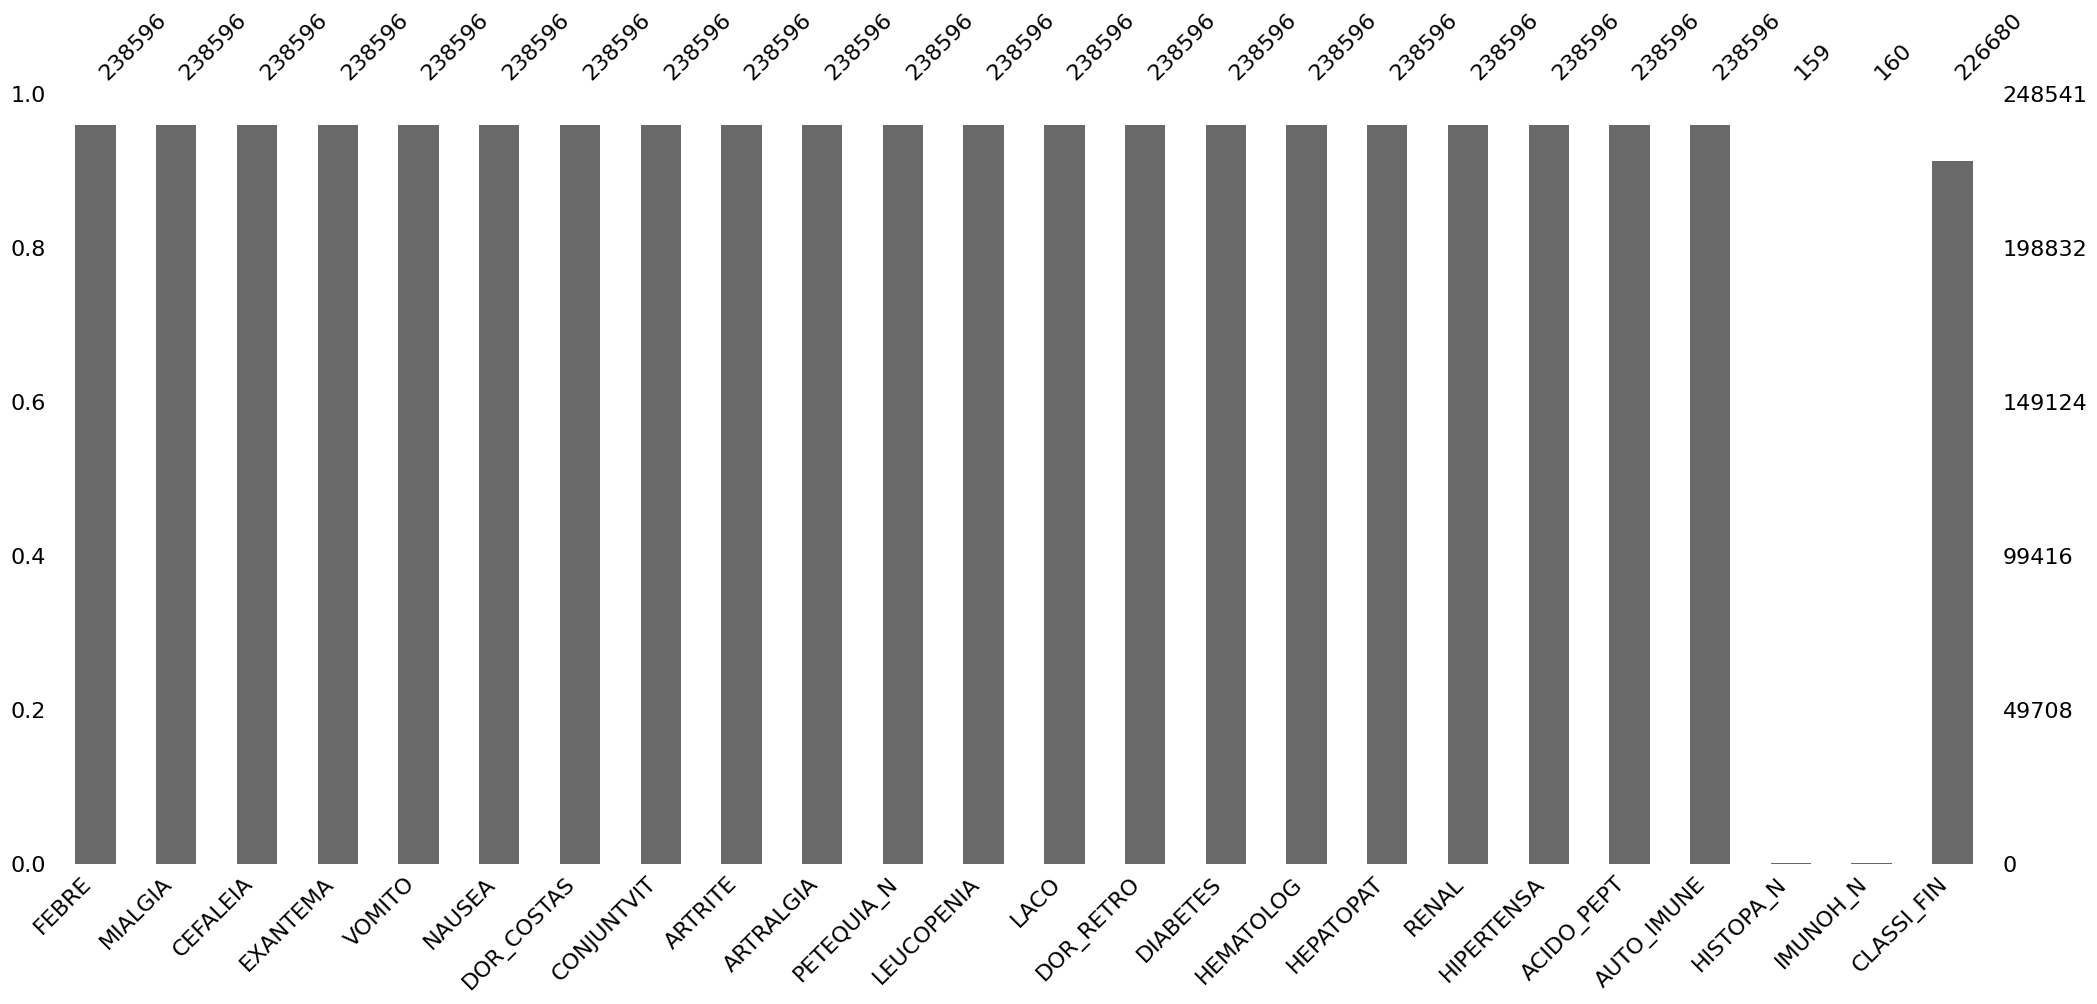

In [9]:
import missingno as msno 
msno.bar(df)

In [10]:
# Remover colunas com 100% de valores nulos
# null_ratio = df.isnull().mean()

# null_threshold = 1.0

# df = df.loc[:, df.isnull().mean() < null_threshold]

# print("Após remoção por nulos:", df.shape)


# NURY: comentei o trecho acima, poisa chei o comportamento estranho, deveria remover as coluna "IMUNOH_N" e "HISTOPA_N". 
# Nao removeu. E no grafico do missingno, elas aparecem com 100% de preenchimento


<Axes: >

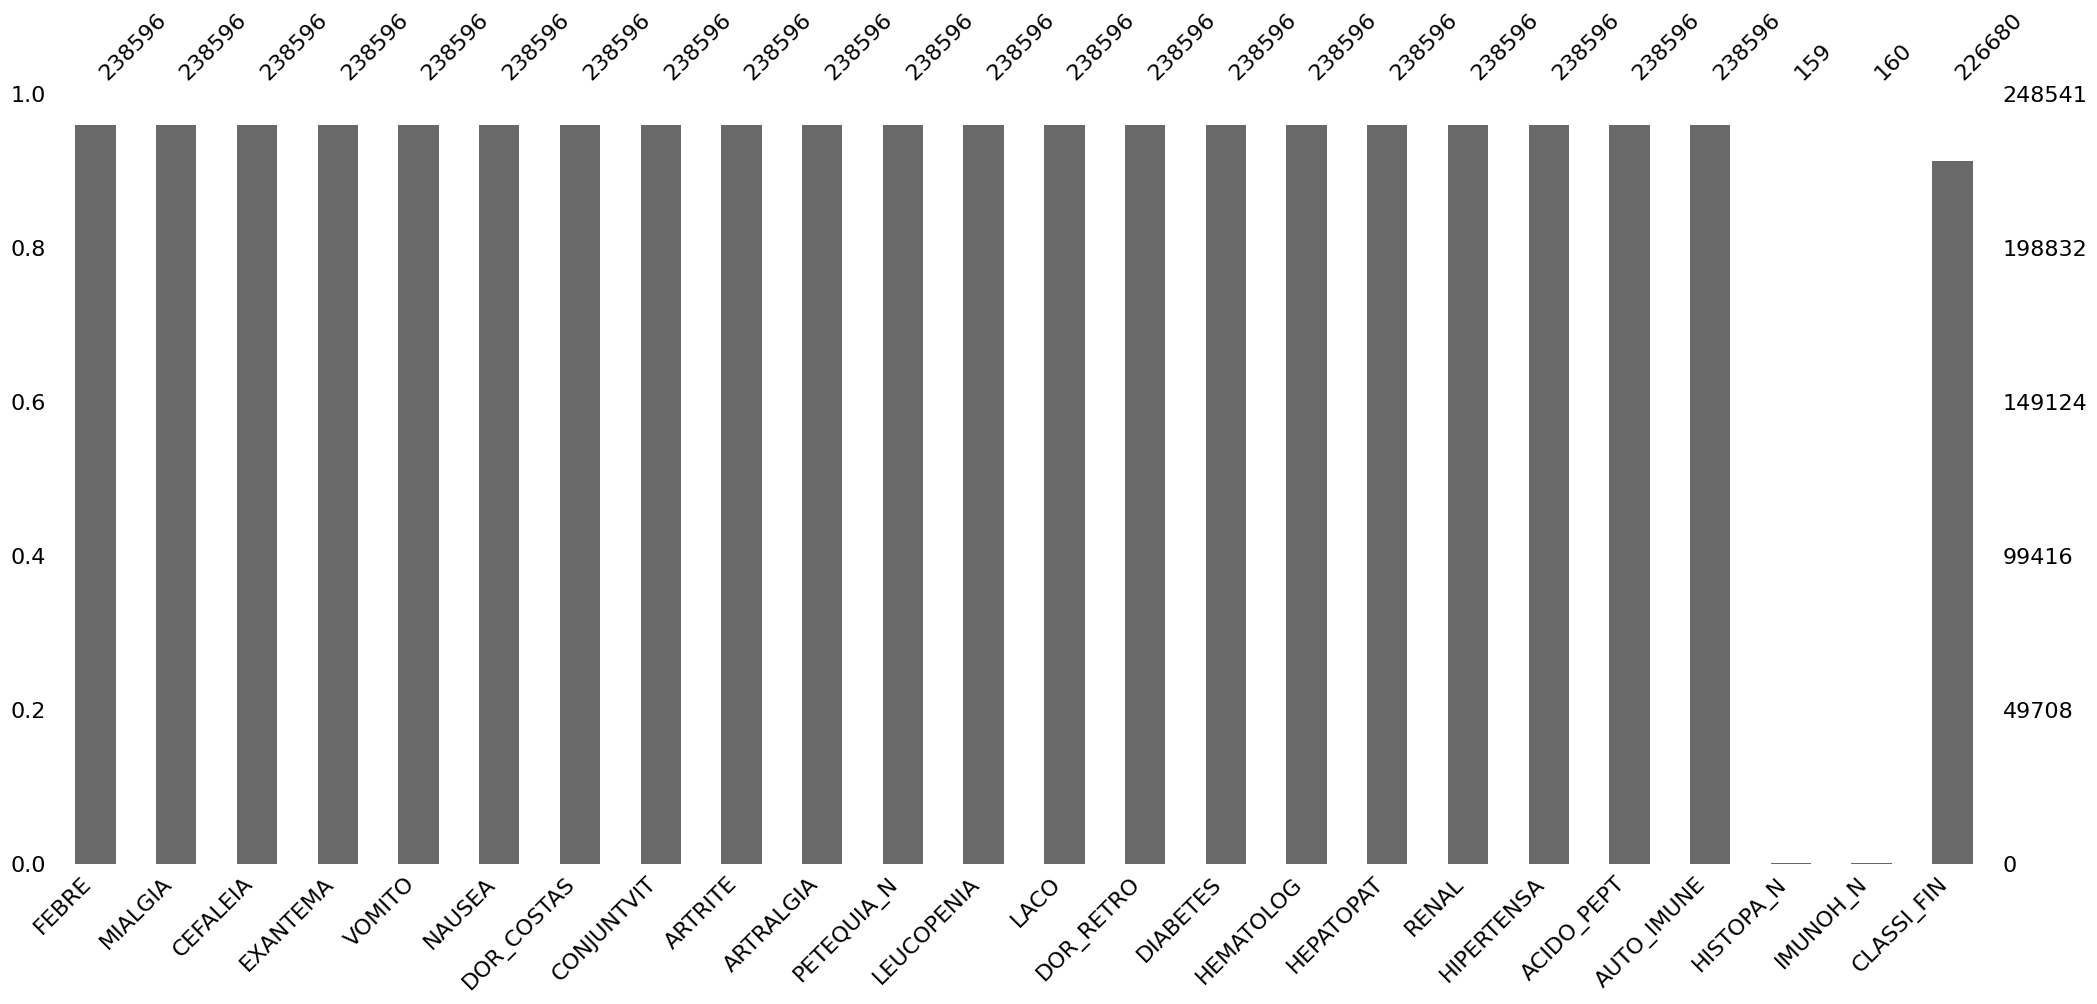

In [11]:
msno.bar(df)

#### Removendo linhas que possuem a "CLASSI_FIN" null, essa é a nossa váriavel alvo

In [ ]:
df = df[df["CLASSI_FIN"].notnull()]

<Axes: >

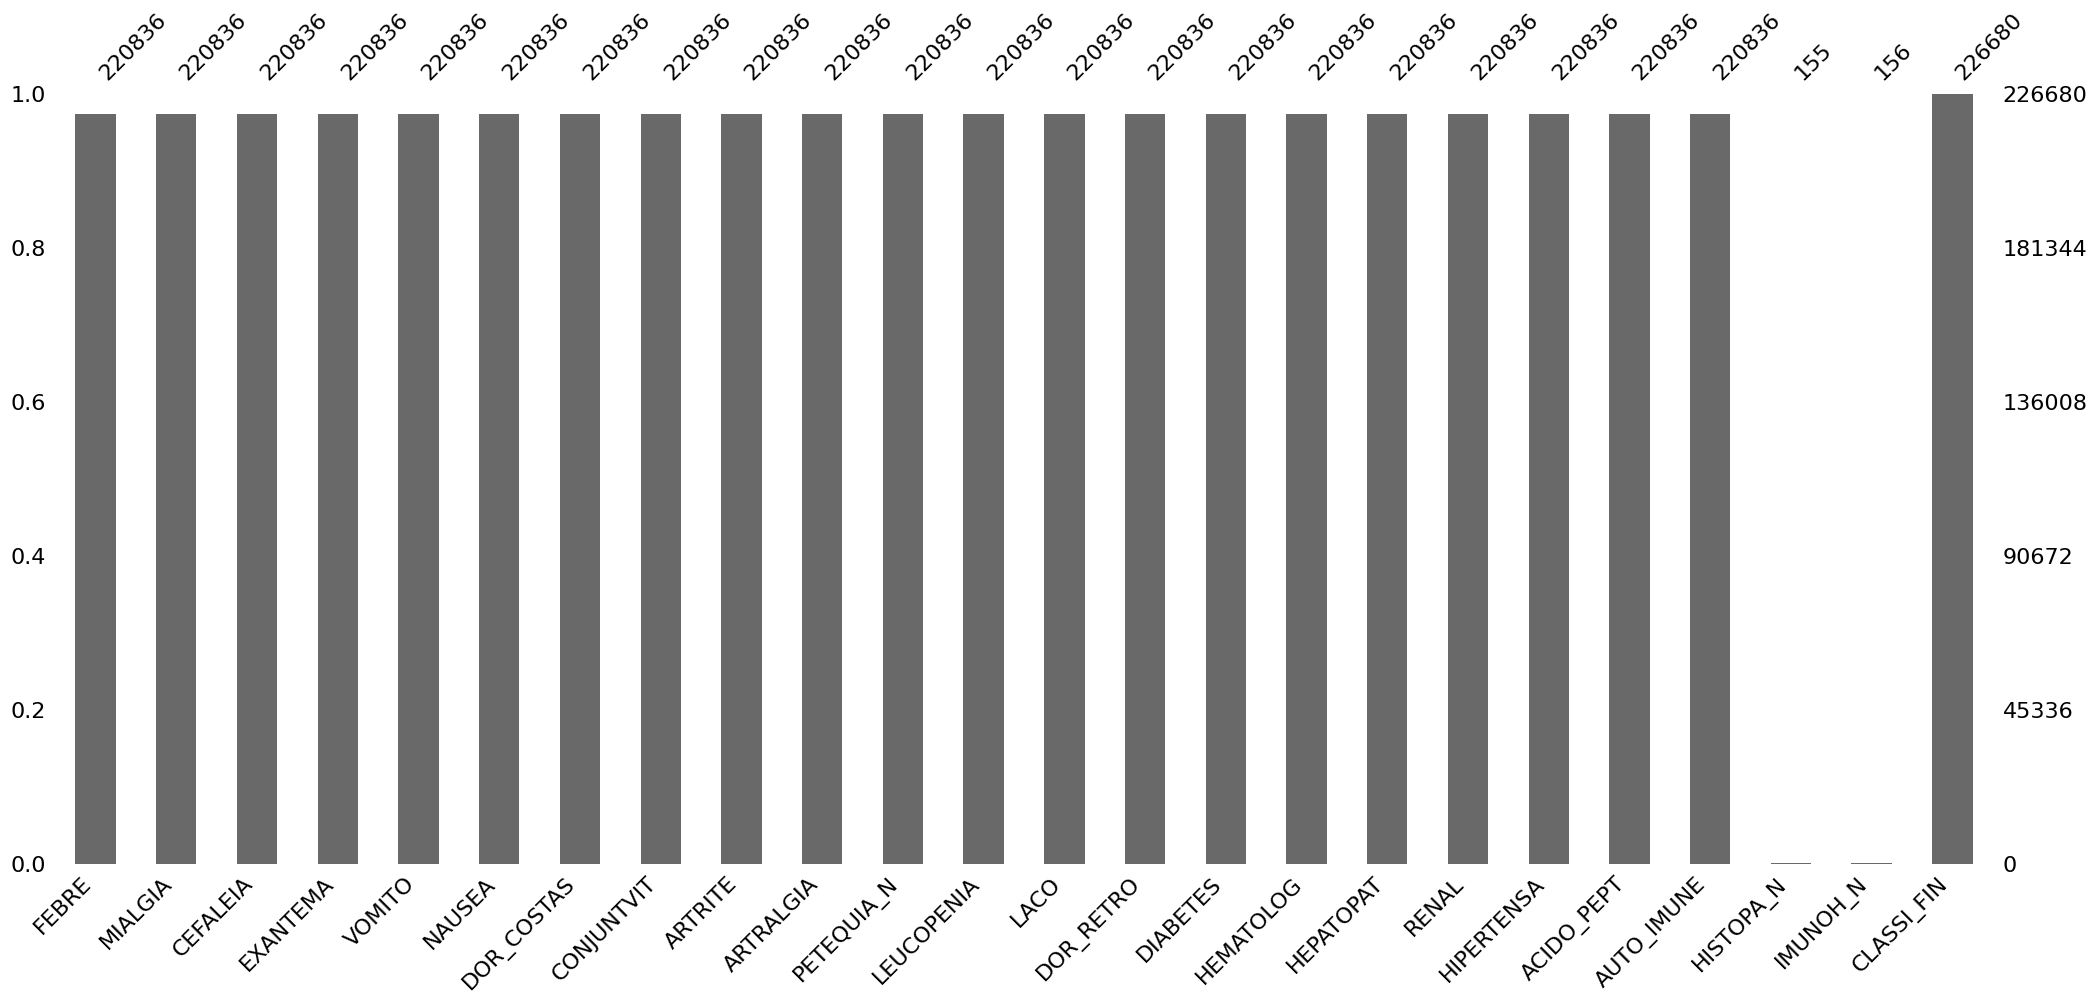

In [26]:
msno.bar(df)

In [14]:
# from sklearn.impute import SimpleImputer
# import numpy as np
# # Preenche os valores NaN com a mediana das colunas
# imputer = SimpleImputer(missing_values= np.nan, strategy='median')
# df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# df.isnull().sum()

# df.info()

# Nury: Acho que as linhas poderiam ser removidas, pois o dataset é grande e a perda de algumas linhas não deve impactar muito a análise futura.

### A coluna target está equilibrada? 

- 5 = Não tem chikungunya
- 13 = Tem chikungunya


Análise: A quantidade entre casos com e sem chickungunya está bem parecido

(array([1.96027991, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.78972009]),
 array([ 5.        ,  5.26666667,  5.53333333,  5.8       ,  6.06666667,
         6.33333333,  6.6       ,  6.86666667,  7.13333333,  7.4       ,
         7.66666667,  7.93333333,  8.2       ,  8.46666667,  8.73333333,
         9.        ,  9.26666667,  9.53333333,  9.8       , 10.06666667,
        10.33333333, 10.6       , 10.86666667, 11.13333333, 11.4       ,
        11.66666667, 11.93333333, 12.2       , 12.46666667, 12.73333333,
        13.        ]),
 <BarContainer object of 30 artists>)

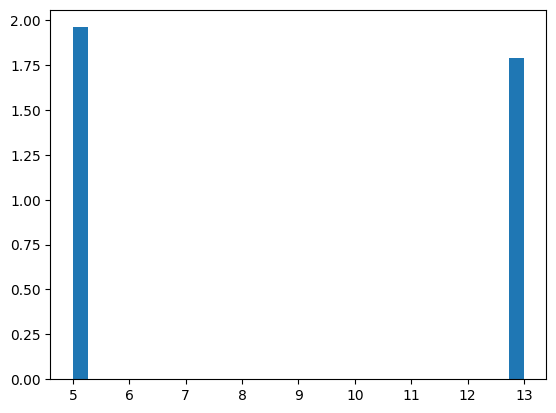

In [15]:
import matplotlib.pyplot as plt
plt.hist(df['CLASSI_FIN'], density=True, bins=30) 

### Análise de correlação

#### Correlação entre colunas

Análise:
Para a classi_fin as colunas estao bem distribuidas sem nenhum detaque aparente. 
Tem algumas colunas que se relacionam entre si, como Vomito e Nausea, Dor nas costas e Artrite e Diabetes e Hipertensão

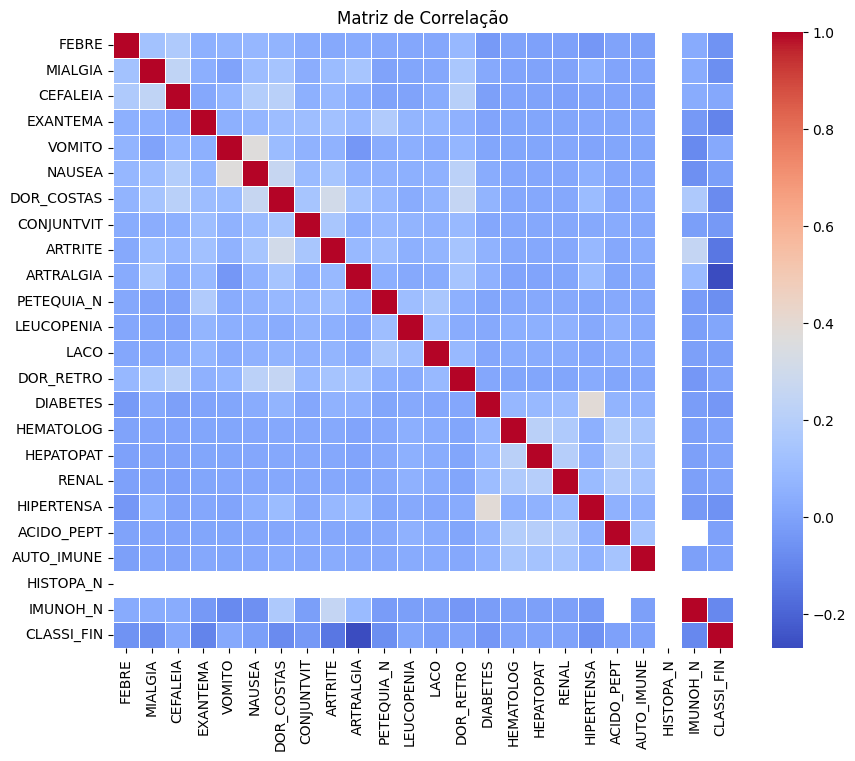

In [22]:
df_corr = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação')
plt.show()

In [18]:
df.corr()["CLASSI_FIN"].sort_values(ascending=False)

CLASSI_FIN    1.00
VOMITO        0.03
CEFALEIA      0.02
LEUCOPENIA    0.01
HEPATOPAT     0.00
DOR_RETRO    -0.00
RENAL        -0.00
HEMATOLOG    -0.00
ACIDO_PEPT   -0.00
AUTO_IMUNE   -0.00
LACO         -0.01
NAUSEA       -0.01
CONJUNTVIT   -0.03
DIABETES     -0.04
FEBRE        -0.06
HIPERTENSA   -0.06
PETEQUIA_N   -0.07
MIALGIA      -0.07
DOR_COSTAS   -0.08
IMUNOH_N     -0.09
EXANTEMA     -0.10
ARTRITE      -0.14
ARTRALGIA    -0.27
HISTOPA_N      NaN
Name: CLASSI_FIN, dtype: float64

In [19]:
# Separar linhas campo classi_fin valor 13 e 5

# Criar um dataframe que contém apenas as duas classes de interesse
df_analise = df[df["CLASSI_FIN"].isin([5.0, 13.0])]

# Agora a correlação funcionará pois existem valores diferentes (5 e 13)
correlacao = df_analise.corr()["CLASSI_FIN"].sort_values(ascending=False)
print(correlacao)

correlacao.value_counts()



CLASSI_FIN    1.00
VOMITO        0.03
CEFALEIA      0.02
LEUCOPENIA    0.01
HEPATOPAT     0.00
DOR_RETRO    -0.00
RENAL        -0.00
HEMATOLOG    -0.00
ACIDO_PEPT   -0.00
AUTO_IMUNE   -0.00
LACO         -0.01
NAUSEA       -0.01
CONJUNTVIT   -0.03
DIABETES     -0.04
FEBRE        -0.06
HIPERTENSA   -0.06
PETEQUIA_N   -0.07
MIALGIA      -0.07
DOR_COSTAS   -0.08
IMUNOH_N     -0.09
EXANTEMA     -0.10
ARTRITE      -0.14
ARTRALGIA    -0.27
HISTOPA_N      NaN
Name: CLASSI_FIN, dtype: float64


CLASSI_FIN
1.00     1
-0.03    1
-0.14    1
-0.10    1
-0.09    1
-0.08    1
-0.07    1
-0.07    1
-0.06    1
-0.06    1
-0.04    1
-0.01    1
0.03     1
-0.01    1
-0.00    1
-0.00    1
-0.00    1
-0.00    1
-0.00    1
0.00     1
0.01     1
0.02     1
-0.27    1
Name: count, dtype: int64

In [20]:
# Como não há uma correlação forte entre as variáveis, será utilizado o modelo de Árvore de Decisão que não depende de correlações lineares entre as variáveis.

In [21]:
# Separando as variáveis preditoras (X) da variável alvo (y)
X = df.drop(columns=['CLASSI_FIN']) # Variáveis características
y = np.log1p(df['CLASSI_FIN']) # O que eu quero prever. (Target)

NameError: name 'np' is not defined

## Treino modelo - LinearRegression

In [ ]:
# Separando as bases em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), "feature de treinamento +", len(X_test), "teste")

In [ ]:
# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression

regressaoLinear = LinearRegression()
regressaoLinear.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = regressaoLinear.predict(X_test)

In [ ]:
# Avaliando o desempenho do modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

## Treino modelo - RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

previsoes = randomForest.predict(X_test)

# Avaliando o desempenho do modelo

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

In [ ]:
X_train.shape

## Comparativo de modelos

In [ ]:
## Criar uma tabela de valores dos desempenhos dos modelos testados